<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-February/blob/main/Streamlit/Deploy_Bank_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bank Loan Prediction Notebook**

**read the dataset**

**The main objective for this dataset**

Using machine learning techniques to predict loan payments.

**target value: Loan_Status**

##Import Important Libraries 📕📗📘

In [ ]:
# importing numpy and pandas 
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/Ramanand-Yadav/EligibilityForBankLoanMLProject/main/trainDataset.csv")
train.sample(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
527,LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y
351,LP002140,Male,No,0,Graduate,No,8750,4167.0,308.0,360.0,1.0,Rural,N
163,LP001570,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural,Y
260,LP001865,Male,Yes,1,Graduate,No,6083,4250.0,330.0,360.0,NaN,Urban,Y


**This dataset is named Loan Prediction Dataset data set. The dataset** 

contains a set of 614 records under 13 attributes:

**Data Description**

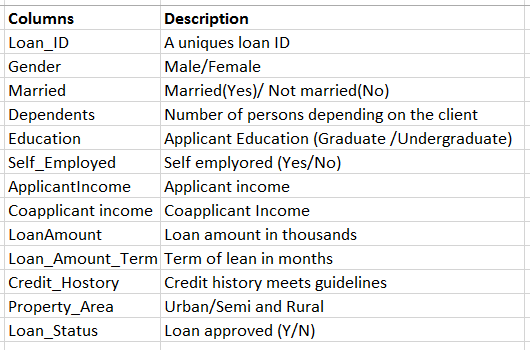


In [ ]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
print("Training Dataset : ", train.shape)

Training Dataset :  (614, 13)


let's focus on preprocessing 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


##Missing values 🚫
As you can see we have some missing data, let's have a look how many we have for each column:

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

columns with null values :  **['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']**



*Gender*

In [ ]:
train['Gender'].isnull().sum()

13

In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


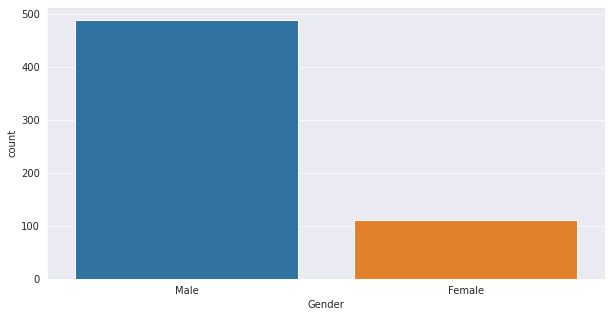

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(train['Gender'])
plt.show()

let's fill the missing value with the male value 

In [ ]:
df = train.copy()

In [ ]:
df['Gender'].dropna().mode().values[0]

'Male'

In [ ]:
train['Gender'] = train['Gender'].fillna(train['Gender'].dropna().mode().values[0])

In [ ]:
train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

Married

In [ ]:
train['Married'].isnull().sum()

3

In [ ]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


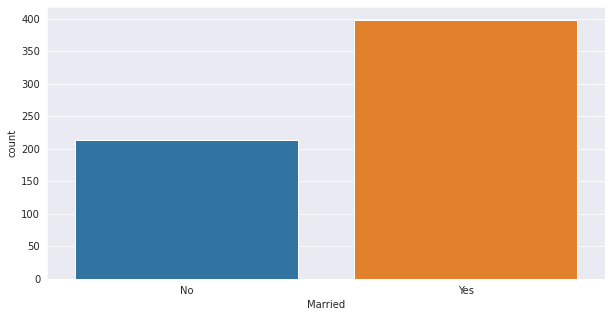

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(train['Married'])
plt.show()

In [ ]:
train['Married'] = train['Married'].fillna(train['Married'].dropna().mode().values[0])

In [ ]:
train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Dependents

In [ ]:
train['Dependents'].isnull().sum()

15

In [ ]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


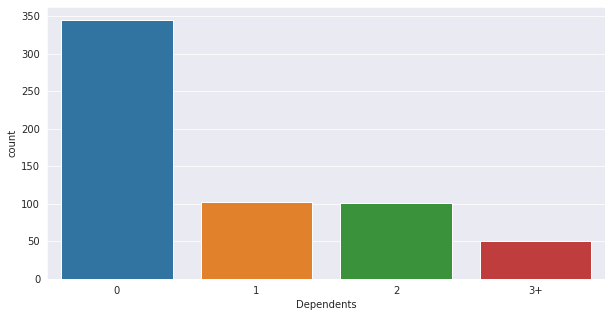

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
sns.countplot(train['Dependents'])
plt.show()

In [ ]:
# let's do forward fill 
train['Dependents'] = train['Dependents'].ffill()

In [ ]:
train['Dependents'].value_counts()

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64

Self_Employed

In [ ]:
train['Self_Employed'].isnull().sum()

32

In [ ]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].dropna().mode().values[0])

Loan_Amount

In [ ]:
train['LoanAmount'].isnull().sum()

22

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


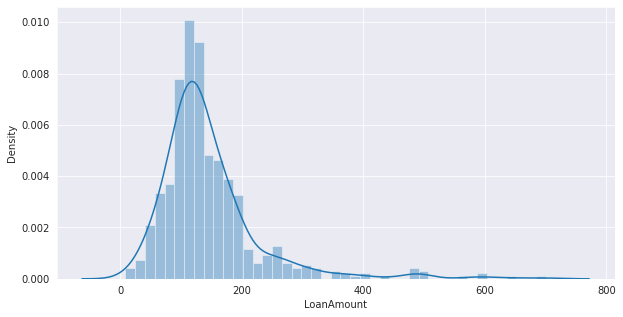

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(train['LoanAmount'])
plt.show()

In [ ]:
mean_value = train['LoanAmount'].mean()
train['LoanAmount'].fillna(value=mean_value, inplace=True)

Loan_Amount_Term

In [ ]:
train['Loan_Amount_Term'].isnull().sum()

14

In [ ]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


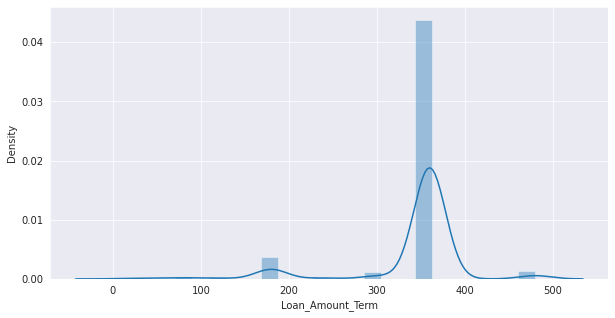

In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(train['Loan_Amount_Term'])
plt.show()

In [ ]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].dropna().mode().values[0])

Credit_History

In [ ]:
train['Credit_History'].isnull().sum()

50

In [ ]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].dropna().mode().values[0])

data is cleaned , let's check 

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##Encoding data to Numeric

In [ ]:
# drop the loan id columns 
train.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
pd.crosstab(train['Gender'], train['Loan_Status'])

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


In [ ]:
pd.crosstab(df['Married'], train['Loan_Status'])

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
pd.crosstab(train['Dependents'], train['Loan_Status'])

Loan_Status,N,Y
Dependents,,
0,109,245
1,37,67
2,28,77
3+,18,33


In [ ]:
pd.crosstab(train['Education'], train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
pd.crosstab(train['Self_Employed'], train['Loan_Status'])

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [ ]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
pd.crosstab(train['Loan_Status'], train['Loan_Status'])

Loan_Status,N,Y
Loan_Status,,
N,192,0
Y,0,422


# Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

X = pd.read_csv("https://raw.githubusercontent.com/Ramanand-Yadav/EligibilityForBankLoanMLProject/main/trainDataset.csv")
X.drop('Loan_ID', axis = 1, inplace = True)

Y = X['Loan_Status']
X = X.drop('Loan_Status', axis=1)

X['Dependents'].replace({'3+': 3}, inplace = True)
X['Dependents'] = pd.to_numeric(X['Dependents'])

coltrans = ColumnTransformer([
      ('imputer-mod_onehot', Pipeline([
                                ('imputer-mod', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(drop='first')),
                              ]), ['Gender', 'Married', 'Self_Employed']),

      ('imputer-mod', SimpleImputer(strategy='most_frequent'), ['Credit_History']),

      ('imputer-mean_scaling', Pipeline([
                                ('imputer-mean', SimpleImputer(strategy='mean')),
                                ('scaling', StandardScaler()),
                              ]), ['Dependents', 'LoanAmount', 'Loan_Amount_Term']),
                              
      ('onehot', OneHotEncoder(drop='first'), ['Education', ]),
      ('scaling', StandardScaler(), ['ApplicantIncome', 'CoapplicantIncome', ]),
])

X = coltrans.fit_transform(X)
pd.DataFrame(X).sample(7)

,0,1,2,3,4,5,6,7,8,9
599,1.0,1.0,0.0,1.0,1.234714,0.542913,0.279851,0.0,0.061687,-0.554487
548,0.0,0.0,0.0,0.0,-0.761490,-0.517002,0.279851,0.0,-0.066097,-0.554487
471,1.0,1.0,0.0,0.0,0.236612,-0.397911,-2.518655,1.0,-0.450595,-0.041468
387,1.0,1.0,0.0,0.0,-0.761490,0.000000,0.279851,1.0,-0.392109,0.518066
385,1.0,0.0,0.0,1.0,0.236612,-0.397911,-2.518655,0.0,-0.284476,-0.554487
172,1.0,1.0,0.0,1.0,2.232816,-0.779004,-2.518655,1.0,-0.308231,-0.554487
135,1.0,1.0,0.0,1.0,2.232816,1.710010,0.279851,0.0,-0.229922,2.096114


# Model Selection

**Models You can use**
* Logistic Regression
* Support Vector machine 
* Decison Tree 
* Random Forest 
* Mixed Naive Bayes 
* Adaboost
* Stacking 
* XGBoost

In this module i will use some of them 

##Logistic Regression


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predict = LR.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predict))

0.8051948051948052


In [ ]:
import pickle

pickle.dump(LR, open('model.pkl', 'wb'))

In [ ]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
y_predict = loaded_model.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.8051948051948052


##support vector machine 

In [ ]:
from sklearn.svm import SVC
svc = SVC()

In [ ]:
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_predict = svc.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_predict))

In [ ]:
SV_SC = accuracy_score(y_test, y_predict)
print("SVC ", f"{round(SV_SC*100, 2)}% accuracy")

SVC  83.77% accuracy


##Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)

In [ ]:
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)

In [ ]:
# print(classification_report(y_test, y_predict))

In [ ]:
DT_SC = accuracy_score(y_test, y_predict)
print("Decison Tree : ", f"{round(DT_SC*100, 2)}% accurate")

Decison Tree :  79.87% accurate


##Mixed Navie Bayes 

In [ ]:
!pip install mixed_naive_bayes

In [ ]:
np.array([1,2,3,'a', 'b', 'c', [1,2,3]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([1, 2, 3, 'a', 'b', 'c', list([1, 2, 3])], dtype=object)

In [ ]:
from mixed_naive_bayes import MixedNB

In [ ]:
MN = MixedNB()
MN.fit(X_train, np.where(y_train == 'Y', 1, 0))

[]


MixedNB(alpha=0.5, var_smoothing=1e-09)

In [ ]:
y_predict = MN.predict(X_test)

In [ ]:
print(classification_report(np.where(y_test == 'Y', 1,0), y_predict))

              precision    recall  f1-score   support

           0       0.92      0.52      0.67        42
           1       0.85      0.98      0.91       112

    accuracy                           0.86       154
   macro avg       0.88      0.75      0.79       154
weighted avg       0.87      0.86      0.84       154



In [ ]:
MN_SC = accuracy_score(np.where(y_test == 'Y', 1,0), y_predict)
print("Mixed Naive Bayes : ", f"{round(MN_SC*100, 2)}% accurate")

Mixed Naive Bayes :  85.71% accurate


##XgBoost

In [ ]:
from xgboost import XGBClassifier
XG = XGBClassifier()

In [ ]:
XG.fit(X_train, y_train)
y_predict = XG.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.79      0.52      0.63        42
           Y       0.84      0.95      0.89       112

    accuracy                           0.83       154
   macro avg       0.81      0.74      0.76       154
weighted avg       0.83      0.83      0.82       154



In [ ]:
XG_SC = accuracy_score(y_test, y_predict)
print("XgBoost : ", f"{round(XG_SC*100, 2)}% accurate")

XgBoost :  83.12% accurate


##Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()

In [ ]:
AB.fit(X_train, y_train)
y_predict = AB.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.71      0.48      0.57        42
           Y       0.83      0.93      0.87       112

    accuracy                           0.81       154
   macro avg       0.77      0.70      0.72       154
weighted avg       0.80      0.81      0.79       154



In [ ]:
AB_SC = accuracy_score(y_test, y_predict)
print("AdaBoost : ", f"{round(AB_SC*100,2)}% accurate")

AdaBoost :  80.52% accurate


#Streamlit

In [ ]:
! pip install streamlit

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import urllib
from PIL import Image

coltrans = ColumnTransformer([
      ('imputer-mod_onehot', Pipeline([
                                ('imputer-mod', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(drop='first')),
                              ]), ['Gender', 'Married', 'Self_Employed']),
      ('imputer-mod', SimpleImputer(strategy='most_frequent'), ['Credit_History']),
      ('imputer-mean_scaling', Pipeline([
                                ('imputer-mean', SimpleImputer(strategy='mean')),
                                ('scaling', StandardScaler()),
                              ]), ['Dependents', 'LoanAmount', 'Loan_Amount_Term']),
      ('onehot', OneHotEncoder(drop='first'), ['Education', ]),
      ('scaling', StandardScaler(), ['ApplicantIncome', 'CoapplicantIncome', ]),
])

@st.cache
def get_data():
    X = pd.read_csv("https://raw.githubusercontent.com/Ramanand-Yadav/EligibilityForBankLoanMLProject/main/trainDataset.csv")
    X.drop('Loan_ID', axis = 1, inplace = True)

    Y = X['Loan_Status']
    X = X.drop('Loan_Status', axis=1)

    X['Dependents'].replace({'3+': 3}, inplace = True)
    X['Dependents'] = pd.to_numeric(X['Dependents'])
    Y = np.where(Y == 'Y', 1, 0)
    return X, Y

X, Y = get_data()
columns = X.columns
X = coltrans.fit_transform(X)

@st.cache
def get_model():
    model = LogisticRegression().fit(X, Y)
    return model

model = get_model()

@st.cache
def get_image():
    urllib.request.urlretrieve(
        'https://raw.githubusercontent.com/Ramanand-Yadav/EligibilityForBankLoanMLProject/main/img1.jpg',
        'img.jpg'
    )

get_image()

data = {}
img = Image.open('img.jpg')
st.image(img)

st.header('Bank Loan Prediction')

data['Gender'] = st.selectbox('Gender', ['Male', 'Female'])
data['Married'] = st.selectbox('Married', ['Yes', 'No'])
data['Dependents'] = st.number_input('Dependents', min_value=0)
data['Education'] = st.selectbox('Education', ['Graduate', 'Not Graduate'])

map = {'Job': 'No', 'Bussiness': 'Yes'}
data['Self_Employed'] = st.selectbox('Self_Employed', ['Job', 'Bussiness']) # format_func
data['Self_Employed'] = map[data['Self_Employed']]

data['ApplicantIncome'] = st.number_input('ApplicantIncome', min_value=0)
data['CoapplicantIncome'] = st.number_input('CoapplicantIncome', min_value=0)
data['LoanAmount'] = st.number_input('LoanAmount', min_value=0)
data['Loan_Amount_Term'] = st.number_input('Loan_Amount_Term', min_value=0)
data['Property_Area'] = st.selectbox('Property_Area', ['Rural', 'Urban', 'Semiurban	'])

map = {'Good': 1, 'Average': 0}
data['Credit_History'] = st.selectbox('Transaction Frequency', ['Good', 'Average']) # format_func
data['Credit_History'] = map[data['Credit_History']]


features = pd.DataFrame(data, index = [0], columns = columns)
st.dataframe(features)



if st.button('Submit'):
    features = coltrans.transform(features)
    pred = model.predict(features)[0]

    if pred == 1:
        st.write('Loan will Approve')
    else:
        st.write('Loan will not Approve')

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1,2,3], [2,8,4])
st.pyplot(fig)

Overwriting app.py


In [ ]:
! streamlit run app.py &>stream.out &

In [ ]:
! npx localtunnel --port 8501 &>stream.out &

In [ ]:
data = {'a': 1, 'b' : 2, 'c': 3}

pd.DataFrame(data, index = [0])

,a,b,c
0,1,2,3
